# Machine Learning

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 !pip install ipython-autotime
 %load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.7 MB/s eta 0:00:00
time: 351 µs (started: 2024-04-27 09:01:15 +00:00)


### Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from gensim.models import KeyedVectors
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from transformers import BertModel, BertTokenizer, DistilBertModel, DistilBertTokenizer, AutoTokenizer, ElectraModel
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

import scipy
import itertools
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


time: 17.5 s (started: 2024-04-27 09:01:15 +00:00)


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

time: 1.03 s (started: 2024-04-27 09:01:32 +00:00)


### Dataset

In [ ]:
dataset_path = '../Data/dataset_5_big_.csv'
df = pd.read_csv(dataset_path)

time: 10.2 s (started: 2024-04-27 09:01:33 +00:00)


In [ ]:
dataset = df[~df['author_id'].isin([69, 251, 53])]

time: 29.2 ms (started: 2024-04-27 09:01:44 +00:00)


In [ ]:
print(len(dataset['author_id'].unique()))

164
time: 9.96 ms (started: 2024-04-27 09:01:44 +00:00)


In [ ]:
author_counts = dataset['author_id'].value_counts()

authors_with_multiple_works = author_counts[author_counts > 1]

dataset = dataset[dataset['author_id'].isin(authors_with_multiple_works.index)]

print('Shape of data: ', dataset.shape)

Shape of data:  (2057, 2)
time: 16.5 ms (started: 2024-04-27 09:01:44 +00:00)


In [ ]:
author_counts = dataset['author_id'].value_counts()
print(author_counts)

author_id
1800    160
520     102
1583    101
1181     86
213      62
       ... 
808       2
1316      2
1298      2
1719      2
292       2
Name: count, Length: 134, dtype: int64
time: 21.8 ms (started: 2024-04-27 09:01:44 +00:00)


In [ ]:
dataset.head()

,author_id,text
1,132,"""It was a good kowl,"" said the leader. ""First ..."
2,132,till the Hall rang and the hounds bayed. De A...
3,132,NaN
4,132,"'Blast and me moped a good deal, and happen we..."
5,132,"Phil Garron, leaning over the side of the stea..."


time: 2.01 s (started: 2024-04-27 09:01:44 +00:00)


In [ ]:
nan_values = dataset.isnull().sum()
nan_values

author_id      0
text         123
dtype: int64

time: 16.3 ms (started: 2024-04-27 09:01:46 +00:00)


<Axes: xlabel='author_id', ylabel='count'>

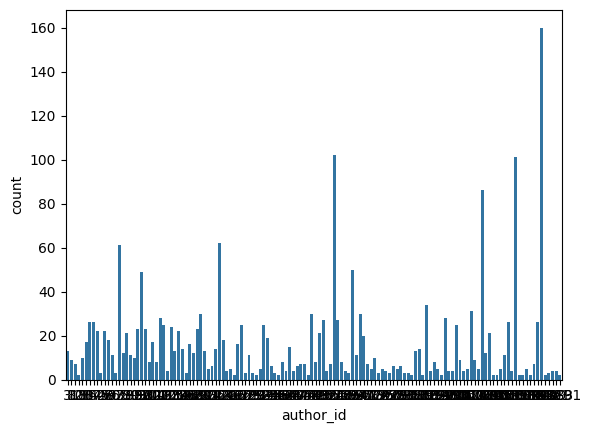

time: 3.03 s (started: 2024-04-27 09:01:46 +00:00)


In [ ]:
sns.countplot(x='author_id', data=dataset)

In [ ]:
dataset.head()

,author_id,text
1,132,"""It was a good kowl,"" said the leader. ""First ..."
2,132,till the Hall rang and the hounds bayed. De A...
3,132,NaN
4,132,"'Blast and me moped a good deal, and happen we..."
5,132,"Phil Garron, leaning over the side of the stea..."


time: 1.42 s (started: 2024-04-27 09:01:49 +00:00)


In [ ]:
dataset = dataset.dropna()

time: 2.67 ms (started: 2024-04-27 09:01:50 +00:00)


In [ ]:
author_counts = dataset['author_id'].value_counts()
print(author_counts)


author_id
1800    160
1583    100
1181     86
520      70
213      62
       ... 
808       2
263       2
832       1
359       1
292       1
Name: count, Length: 134, dtype: int64
time: 3.53 ms (started: 2024-04-27 09:01:50 +00:00)


In [ ]:
dataset = dataset[~dataset['author_id'].isin([832, 359, 292])]

time: 7.56 ms (started: 2024-04-27 09:01:50 +00:00)


### Preprocessing

In [ ]:
def preprocess_text(text):
    # Odstránenie non-ASCII znakov
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    # Odstránenie čísel
    text = re.sub(r'\d+', '', text)
    # Odstránenie interpunkcie
    text = re.sub(r'[^\w\s]', '', text)
    # Prevod na malé písmena
    text = text.lower()
    # Odstránenie stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    # Lemmatizácia
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return ' '.join(lemmatized_words)


time: 8.19 ms (started: 2024-04-27 09:01:50 +00:00)


In [ ]:
dataset['processed_text'] = dataset['text'].apply(preprocess_text)

time: 4min 54s (started: 2024-04-27 09:01:50 +00:00)


In [ ]:
dataset.head()

,author_id,text,processed_text
1,132,"""It was a good kowl,"" said the leader. ""First ...",good kowl said leader first chaplain laughed t...
2,132,till the Hall rang and the hounds bayed. De A...,till hall rang hound bayed de aquila held hand...
4,132,"'Blast and me moped a good deal, and happen we...",blast moped good deal happen didnt behave well...
5,132,"Phil Garron, leaning over the side of the stea...",phil garron leaning side steamer rain felt unh...
6,132,"You talk o' better food for us, an' schools, a...",talk better food u school fire well wait extry...


time: 3.29 s (started: 2024-04-27 09:06:45 +00:00)


### Rozdelenie dát na test / train data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset.processed_text, dataset.author_id, test_size=0.20, random_state=13, stratify=dataset.author_id)

time: 7.43 ms (started: 2024-04-27 09:06:49 +00:00)


In [ ]:
print('Train')
print(y_train.value_counts())
print('Test')
print(y_test.value_counts())

Train
author_id
1800     128
1583      80
1181      69
520       56
213       50
        ... 
750        2
356        2
38191      2
1842       2
455        2
Name: count, Length: 131, dtype: int64
Test
author_id
1800    32
1583    20
1181    17
520     14
213     12
        ..
123      1
344      1
859      1
761      1
247      1
Name: count, Length: 117, dtype: int64
time: 8.2 ms (started: 2024-04-27 09:06:49 +00:00)


## Vektorizácia

## Bag of Words


In [ ]:
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

time: 21.9 s (started: 2024-04-27 09:06:49 +00:00)


### Logistická regresia

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

model.fit(X_train_vect, y_train)

y_pred = model.predict(X_test_vect)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8604651162790697
F1 score: 0.8287137925863884
Precision: 0.8182821107381516
Recall: 0.8604651162790697
Confusion Matrix:
 [[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
time: 13min 50s (started: 2024-04-27 09:07:11 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive-Bayes

In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_vect, y_train)

predicted_labels = classifier.predict(X_test_vect)

test_accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))


Accuracy: 0.4935400516795866
F1 score: 0.40852220932319144
Precision: 0.44808812729374
Recall: 0.4935400516795866
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
time: 6.92 s (started: 2024-04-27 09:21:01 +00:00)


## TF - IDF

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

time: 25.6 s (started: 2024-04-27 09:21:08 +00:00)


### Logistická regresia

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5064599483204134
F1 score: 0.432691328598785
Precision: 0.4772737275135187
Recall: 0.5064599483204134
Confusion Matrix:
 [[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
time: 3min 8s (started: 2024-04-27 09:21:33 +00:00)


### Naive-Bayes

In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_tfidf, y_train)

predicted_labels = classifier.predict(X_test_tfidf)

test_accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))


Accuracy: 0.18604651162790697
F1 score: 0.11692883636544962
Precision: 0.11464612024256485
Recall: 0.18604651162790697
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
time: 5.41 s (started: 2024-04-27 09:24:42 +00:00)


## GloVe


In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec

glove_input_file = '/content/drive/MyDrive/glove.6B.300d.txt'
word2vec_output_file = 'glove.6B.300d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)


<ipython-input-28-5c75194aba4b>:5: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


(400000, 300)

time: 3min 2s (started: 2024-04-27 09:24:48 +00:00)


In [ ]:
import numpy as np
from gensim.models import KeyedVectors

glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

def document_vector(doc):
    words = doc.split()
    valid_words = [word for word in words if word in glove_model.key_to_index]
    if not valid_words:
        return np.zeros(glove_model.vector_size)
    doc_embedding = np.mean(glove_model[valid_words], axis=0)
    return doc_embedding

processed_texts = dataset['processed_text'].tolist()

embedding_matrix = np.array([document_vector(doc) for doc in processed_texts])


time: 3min 10s (started: 2024-04-27 09:27:50 +00:00)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

labels = dataset['author_id'].tolist()

X_train, X_test, y_train, y_test = train_test_split(embedding_matrix, labels, test_size=0.2, random_state=42)


time: 4.16 ms (started: 2024-04-27 09:31:00 +00:00)


In [ ]:
print(X_train)
print(y_train)

[[-0.07738061 -0.01588609 -0.02081648 ... -0.05867539 -0.06143926
   0.09504104]
 [-0.06751478 -0.00373391 -0.04121243 ... -0.05305246 -0.02893518
   0.09783936]
 [-0.09041601 -0.00344835 -0.03254961 ... -0.05067522 -0.04609265
   0.07236204]
 ...
 [-0.08636351  0.02900244 -0.03860972 ... -0.06186779 -0.0346377
   0.08723738]
 [-0.09869552 -0.03274052 -0.02655795 ... -0.09006662 -0.07114819
   0.1625207 ]
 [-0.08374154  0.03575202 -0.03273089 ... -0.09439304 -0.09677246
   0.0415137 ]]
[365, 132, 520, 945, 181, 1800, 1583, 1583, 127, 945, 993, 93, 35, 125, 595, 485, 1583, 1181, 136, 42, 1719, 1186, 761, 1744, 1181, 212, 595, 1800, 1181, 993, 520, 1583, 1800, 520, 120, 1127, 181, 213, 1800, 1075, 919, 173, 136, 2561, 520, 35, 1186, 35, 60, 220, 1583, 1800, 945, 125, 717, 1758, 1626, 28, 181, 1583, 1075, 1800, 1800, 324, 1583, 344, 127, 467, 35, 120, 65, 1583, 945, 1800, 97, 213, 181, 97, 80, 850, 1186, 1230, 132, 93, 467, 3, 520, 1583, 945, 1583, 407, 1583, 1487, 1032, 1583, 1230, 183, 

### Logistická regresia

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.40568475452196384
F1 score: 0.2882139959819921
Precision: 0.26646118521701834
Recall: 0.40568475452196384
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
time: 4.99 s (started: 2024-04-27 09:31:00 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive-Bayes

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

time: 15.6 ms (started: 2024-04-27 09:31:05 +00:00)


In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_scaled, y_train)

predicted_labels = classifier.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))

Accuracy: 0.49612403100775193
F1 score: 0.41985237601959496
Precision: 0.41746079838439715
Recall: 0.49612403100775193
Confusion Matrix:
 [[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
time: 65 ms (started: 2024-04-27 09:31:06 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Word2Vec

In [ ]:
model_path = '../Data/GoogleNews-vectors-negative300.bin'
w2v_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

time: 1min 22s (started: 2024-04-27 09:31:06 +00:00)


In [ ]:
def document_vector(model, doc):
    words = doc.split()
    valid_words = [word for word in words if word in model.key_to_index]
    if not valid_words:
        return np.zeros(model.vector_size)
    return np.mean(model[valid_words], axis=0)


time: 765 µs (started: 2024-04-27 09:32:28 +00:00)


In [ ]:
document_vectors = np.array([document_vector(w2v_model, doc) for doc in dataset['processed_text']])

time: 1min 23s (started: 2024-04-27 09:32:28 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(document_vectors, dataset['author_id'], test_size=0.2, random_state=42)

time: 5.28 ms (started: 2024-04-27 09:33:52 +00:00)


### Logistická regresia

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.25064599483204136
F1 score: 0.13180203538571822
Precision: 0.11528128449268725
Recall: 0.25064599483204136
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
time: 3.63 s (started: 2024-04-27 09:33:52 +00:00)


### Naive-Bayes

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

time: 10.4 ms (started: 2024-04-27 09:33:56 +00:00)


In [ ]:
X_train_scaled

array([[0.56403357, 0.6515259 , 0.63432956, ..., 0.3308395 , 0.6086675 ,
        0.38114148],
       [0.48274314, 0.6395988 , 0.5450222 , ..., 0.44025075, 0.5427691 ,
        0.4098011 ],
       [0.56093705, 0.62043816, 0.6011718 , ..., 0.34298635, 0.5946064 ,
        0.35558355],
       ...,
       [0.55423045, 0.53662235, 0.5084798 , ..., 0.51337194, 0.69647944,
        0.2819228 ],
       [0.3228658 , 0.529811  , 0.3805982 , ..., 0.30568105, 0.6356127 ,
        0.30541107],
       [0.47117132, 0.59903294, 0.5090642 , ..., 0.5021445 , 0.6599808 ,
        0.35241944]], dtype=float32)

time: 8.62 ms (started: 2024-04-27 09:33:56 +00:00)


In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_scaled, y_train)

predicted_labels = classifier.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))

Accuracy: 0.48578811369509045
F1 score: 0.40831670823233984
Precision: 0.40193286675844814
Recall: 0.48578811369509045
Confusion Matrix:
 [[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
time: 38.1 ms (started: 2024-04-27 09:33:56 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Bert

In [ ]:
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

def bert_encode(document, tokenizer, model):
    inputs = tokenizer(document, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[:, 0, :].detach().numpy()
    return embeddings



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

time: 8.23 s (started: 2024-04-27 09:33:56 +00:00)


In [ ]:
documents = dataset['processed_text']
labels = dataset['author_id']

embeddings = np.vstack([bert_encode(doc, tokenizer, model) for doc in documents])

time: 1h 27min 51s (started: 2024-04-27 09:34:04 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2)

time: 87.1 ms (started: 2024-04-27 11:01:55 +00:00)


### Logistická regresia

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5167958656330749
F1 score: 0.4664084583659553
Precision: 0.4859198382382576
Recall: 0.5167958656330749
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
time: 44.9 s (started: 2024-04-27 11:01:55 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive-Bayes

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

time: 38.2 ms (started: 2024-04-27 11:02:40 +00:00)


In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_scaled, y_train)

predicted_labels = classifier.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))

Accuracy: 0.42377260981912146
F1 score: 0.36190662224789677
Precision: 0.36752606106135277
Recall: 0.42377260981912146
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
time: 159 ms (started: 2024-04-27 11:02:40 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## DistilBert

In [ ]:
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertModel.from_pretrained(model_name)

def bert_encode(document, tokenizer, model):
    inputs = tokenizer(document, max_length=512, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[:, 0, :].detach().numpy()
    return embeddings



tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

time: 6.34 s (started: 2024-04-27 11:02:41 +00:00)


In [ ]:
documents = dataset['processed_text']
labels = dataset['author_id']

embeddings = np.vstack([bert_encode(doc, tokenizer, model) for doc in documents])

time: 52min 43s (started: 2024-04-27 11:02:47 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2)

time: 133 ms (started: 2024-04-27 11:55:31 +00:00)


### Logistická regresia

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.4780361757105943
F1 score: 0.40225096495376333
Precision: 0.3936134239042799
Recall: 0.4780361757105943
Confusion Matrix:
 [[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
time: 38.5 s (started: 2024-04-27 11:55:31 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive-Bayes

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

time: 22.5 ms (started: 2024-04-27 11:56:09 +00:00)


In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_scaled, y_train)

predicted_labels = classifier.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.4160206718346253
F1 score: 0.35630014376024405
Precision: 0.3529140782746754
Recall: 0.4160206718346253
Confusion Matrix:
 [[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
time: 116 ms (started: 2024-04-27 11:56:09 +00:00)


time: 129 ms (started: 2024-04-27 11:56:09 +00:00)


## Electra

In [ ]:
model_name = 'google/electra-small-discriminator'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = ElectraModel.from_pretrained(model_name)

def electra_encode(document, tokenizer, model):
    inputs = tokenizer(document, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[:, 0, :].detach().numpy()
    return embeddings



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

time: 5 s (started: 2024-04-27 11:56:10 +00:00)


In [ ]:
documents = dataset['processed_text']
labels = dataset['author_id']

embeddings = np.vstack([electra_encode(doc, tokenizer, model) for doc in documents])

time: 16min 22s (started: 2024-04-27 11:56:15 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2)

time: 138 ms (started: 2024-04-27 12:12:37 +00:00)


### Logistická regresia

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.4160206718346253
F1 score: 0.35118097908334944
Precision: 0.33060336408245755
Recall: 0.4160206718346253
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
time: 11.9 s (started: 2024-04-27 12:12:37 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive-Bayes

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

time: 12 ms (started: 2024-04-27 12:12:49 +00:00)


In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_scaled, y_train)

predicted_labels = classifier.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))

Accuracy: 0.26356589147286824
F1 score: 0.19641659640171655
Precision: 0.23879853996133069
Recall: 0.26356589147286824
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
time: 86.7 ms (started: 2024-04-27 12:12:49 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


time: 97 ms (started: 2024-04-27 12:12:49 +00:00)
